<div>
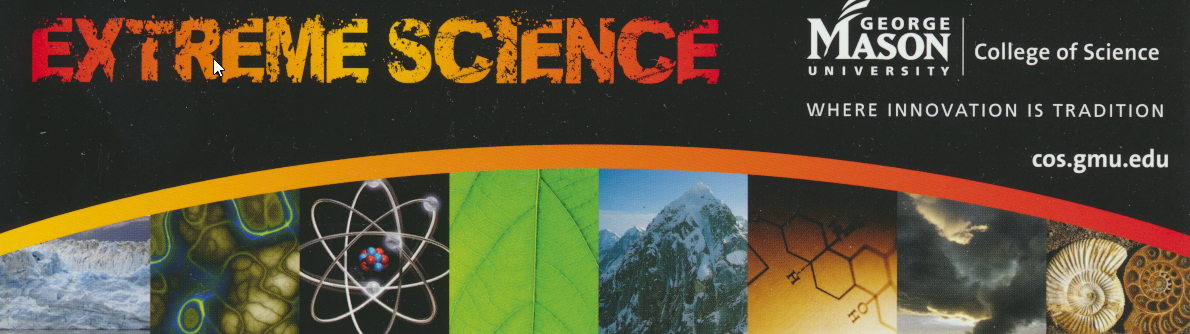
</div>

# Assignment 7

In this assignment we will be using an extracted subset of a CDC dataset covering individual US Covid Cases

Link: https://data.cdc.gov/Case-Surveillance/COVID-19-Case-Surveillance-Public-Use-Data-with-Ge/n8mc-b4w4

<div>
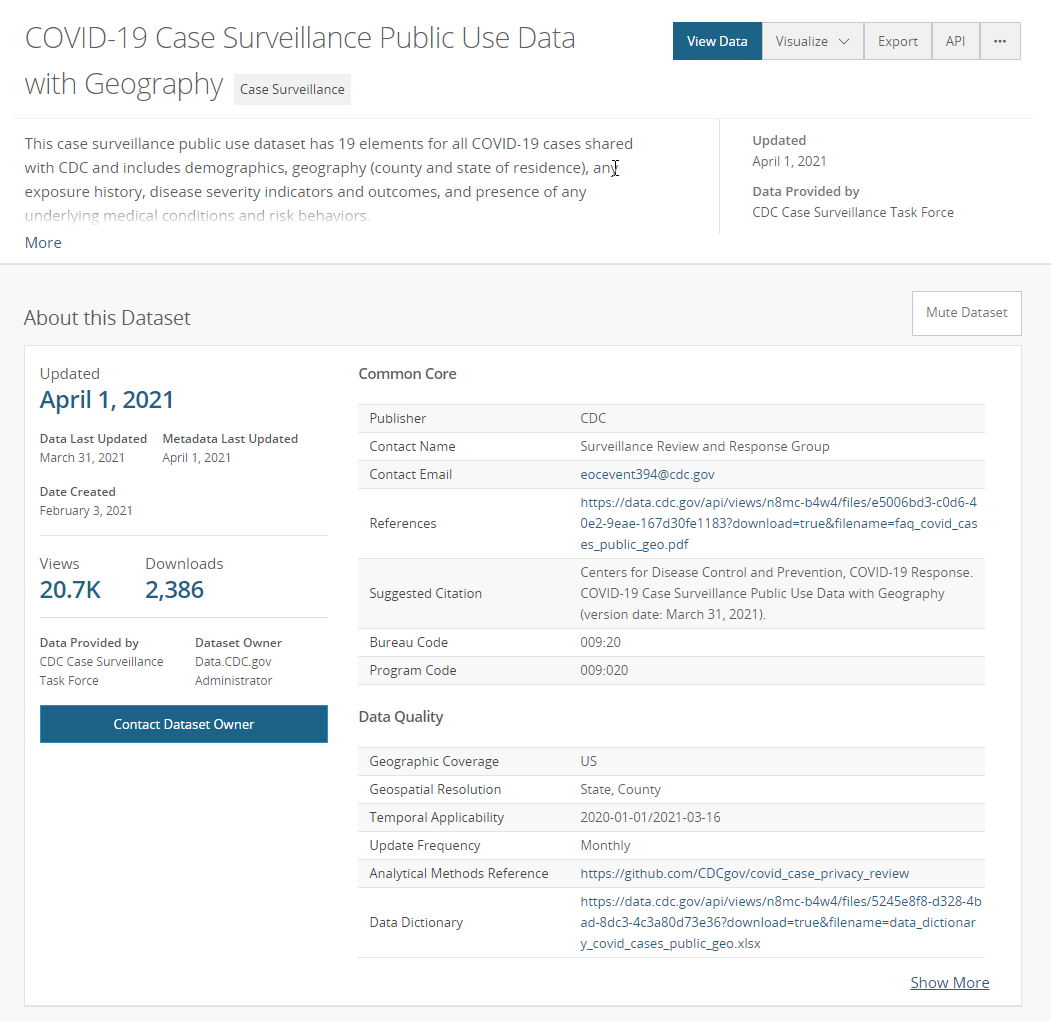
</div>


# Steps to Complete

To complete this assignment, complete each step below.  Please turn in both your .ipynb file, and a PDF your notebook

Review the link above describing the full dataset, due to its size I have extracted a subset covering virginia only

- Step 0 - Copy and save this notebook.  Name it using your GMU netid, netid-assignment-7
    - For example (for me) this would be jboone-assignment-7.ipynb
- Step 1 - Connect to the dataset provided
    - The data is provided in CSV file located in the ./data subdirectory (see va-cases-0.csv)
- Step 2 - Summarize the dataset as prompted 
- Step 3 - Clean the dataset as prompted
- Step 4 - Add the new table to our existing SQLite database (created in the Pandas Part 1 notebook)
- Step 5 - Build an index on the new table
- Step 6 - Query the database using pandas

In [1]:
# basics
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mpl_toolkits.axes_grid1 import make_axes_locatable

# needed for direct http requests for COVID data 
import io
import requests

# time
import time

# datetimes
import datetime as dt

# pandas - depending on your environment
# you may need to add these modules to your enviornment via 
#
# pip install pandas 
#
# OR
#
# conda install pandas
#
#
import pandas as pd

# sqlite
import sqlite3 as sql

## Step 1 - Connect to the Data Source 

In [2]:
filepath = 'assignment-7/data/va-cases-0.csv'
db_dir = '/Users/zachstept/OneDrive - George Mason University/GMU/Spring 2021/CDS 302/'              # note this should point to a location on your drive of the database resulting from running the pandas-0.ipynb notebook (see week 11)

# Your Code Here:
va_cases = pd.read_csv(db_dir+filepath)

## Step 2 - Summarize 

In [3]:
# Display the number of rows and columns in the dataset
# Your Code Here
rows = len(va_cases.axes[0])
cols = len(va_cases.axes[1])
print("Number of Rows: " + str(rows))
print("Number of Columns: " + str(cols))

Number of Rows: 533688
Number of Columns: 20


In [4]:
# Display the columns in the dataset
# Your Code Here
for col in va_cases.columns:
    print(col)

Unnamed: 0
case_month
res_state
state_fips_code
res_county
county_fips_code
age_group
sex
race
ethnicity
case_positive_specimen_interval
case_onset_interval
process
exposure_yn
current_status
symptom_status
hosp_yn
icu_yn
death_yn
underlying_conditions_yn


In [5]:
# Display the data types for each column
# Your Code Here
datatypes = va_cases.dtypes
datatypes

Unnamed: 0                           int64
case_month                          object
res_state                           object
state_fips_code                    float64
res_county                          object
county_fips_code                   float64
age_group                           object
sex                                 object
race                                object
ethnicity                           object
case_positive_specimen_interval    float64
case_onset_interval                float64
process                             object
exposure_yn                         object
current_status                      object
symptom_status                      object
hosp_yn                             object
icu_yn                              object
death_yn                            object
underlying_conditions_yn            object
dtype: object

In [6]:
# dump the summary contents of the data frame, or print the first few rows
# Your Code Here
va_cases.head(10)

,Unnamed: 0,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
0,5196,2020-02,VA,51.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Yes,Missing,NaN,NaN
1,5197,2020-02,VA,51.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Yes,Missing,NaN,NaN
2,5198,2020-03,VA,51.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Yes,Missing,No,NaN
3,5199,2020-03,VA,51.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,NaN
4,5200,2020-03,VA,51.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,NaN
5,5201,2020-03,VA,51.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,NaN
6,5202,2020-03,VA,51.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,NaN
7,5203,2020-03,VA,51.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,NaN
8,5204,2020-03,VA,51.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,NaN
9,5205,2020-03,VA,51.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,NaN


## Step 3 - Perform minor clean-up on the dataset 

In [7]:
# display the unique values present for the counties present (use: res_county)
# Your Code Here
va_cases.res_county.unique()

array([nan, 'ACCOMACK', 'ALBEMARLE', 'AMHERST', 'ARLINGTON', 'AUGUSTA',
       'BEDFORD', 'BOTETOURT', 'CAROLINE', 'CHESAPEAKE', 'CHESTERFIELD',
       'CULPEPER', 'DANVILLE', 'DINWIDDIE', 'FAIRFAX', 'FLUVANNA',
       'FREDERICK', 'FREDERICKSBURG', 'GLOUCESTER', 'GOOCHLAND',
       'HALIFAX', 'HAMPTON', 'HENRICO', 'HOPEWELL', 'ISLE OF WIGHT',
       'KING GEORGE', 'LEE', 'LOUISA', 'LYNCHBURG', 'MANASSAS',
       'MECKLENBURG', 'MONTGOMERY', 'NEW KENT', 'NEWPORT NEWS', 'NORFOLK',
       'ORANGE', 'PITTSYLVANIA', 'PORTSMOUTH', 'POWHATAN', 'PULASKI',
       'RICHMOND CITY', 'ROANOKE', 'ROANOKE CITY', 'ROCKBRIDGE',
       'ROCKINGHAM', 'SALEM', 'STAFFORD', 'TAZEWELL', 'VIRGINIA BEACH',
       'WARREN', 'WINCHESTER', 'WISE', 'WYTHE', 'YORK', 'ALEXANDRIA',
       'BUCHANAN', 'CAMPBELL', 'FAUQUIER', 'FRANKLIN', 'HENRY',
       'PETERSBURG', 'PRINCE WILLIAM', 'RUSSELL', 'SCOTT', 'SHENANDOAH',
       'WAYNESBORO', 'CARROLL', 'CHARLOTTESVILLE', 'HARRISONBURG', 'PAGE',
       'PRINCE EDWARD', 'S

In [8]:
# Note that there are null values for res_county (nan)
# Drop the rows from the dataframe if the res_county field is null
# Hint: you can also think of this as only keeping the rows where the res_county column is not null
# Your Code
va_cases = va_cases[va_cases['res_county'].notna()]

In [9]:
# display the unique values present for the counties present (again) 
# to ensure that the nan values have been removed
# Your Code Here
va_cases.res_county.unique()

array(['ACCOMACK', 'ALBEMARLE', 'AMHERST', 'ARLINGTON', 'AUGUSTA',
       'BEDFORD', 'BOTETOURT', 'CAROLINE', 'CHESAPEAKE', 'CHESTERFIELD',
       'CULPEPER', 'DANVILLE', 'DINWIDDIE', 'FAIRFAX', 'FLUVANNA',
       'FREDERICK', 'FREDERICKSBURG', 'GLOUCESTER', 'GOOCHLAND',
       'HALIFAX', 'HAMPTON', 'HENRICO', 'HOPEWELL', 'ISLE OF WIGHT',
       'KING GEORGE', 'LEE', 'LOUISA', 'LYNCHBURG', 'MANASSAS',
       'MECKLENBURG', 'MONTGOMERY', 'NEW KENT', 'NEWPORT NEWS', 'NORFOLK',
       'ORANGE', 'PITTSYLVANIA', 'PORTSMOUTH', 'POWHATAN', 'PULASKI',
       'RICHMOND CITY', 'ROANOKE', 'ROANOKE CITY', 'ROCKBRIDGE',
       'ROCKINGHAM', 'SALEM', 'STAFFORD', 'TAZEWELL', 'VIRGINIA BEACH',
       'WARREN', 'WINCHESTER', 'WISE', 'WYTHE', 'YORK', 'ALEXANDRIA',
       'BUCHANAN', 'CAMPBELL', 'FAUQUIER', 'FRANKLIN', 'HENRY',
       'PETERSBURG', 'PRINCE WILLIAM', 'RUSSELL', 'SCOTT', 'SHENANDOAH',
       'WAYNESBORO', 'CARROLL', 'CHARLOTTESVILLE', 'HARRISONBURG', 'PAGE',
       'PRINCE EDWARD', 'SMYTH'

In [10]:
# Note the column 'Unnamed: 0' - this is likely a row identifier from the original
# data set - drop this column
# Your Code Here
va_cases = va_cases.drop(['Unnamed: 0'], axis = 1)

In [11]:
# Drop any row where age_group and sex are are both null 
# Your Code Here
va_cases = va_cases[va_cases['age_group'].notna() & va_cases['sex'].notna()]

In [12]:
# add two new columns that split case_month into year, month
# 
# Some hints:
# 
# You may add a new column to a dataframe in more than one way
# in the lectures, I use the insert() function, but you can also
# do this directly...like this:
#
# df['new_column'] = (some function of another column)
# 
# Further hints - see the .str and .slice functions in pandas 
#

# Your Code Here
va_cases['year'] = pd.DatetimeIndex(va_cases['case_month']).year
va_cases['month'] = pd.DatetimeIndex(va_cases['case_month']).month

## Step 4 - Add the new table to the database

In [13]:
# add a new columns that for our new table that acts as a the 'UID' (unique identifier)
# (see the Pandas Part 1 Lecture)
# 
# Some hints:
#
# You can use a series of converstions to convert county_fips_code field into the 
# needed value, prepend the this with '840' (USA)
# and then covert all of that into an integer (You do not need to do this all in one statement)
#
# Your Code Here
va_cases['UID'] = '840' + va_cases['county_fips_code'].astype(str)

In [14]:
# Save the new table to the existing database
# Your Code Here
conn = sql.connect(db_dir+'covid-19.db')
va_cases.to_sql('va_cases', conn, if_exists='replace', index=False)
conn.close()

## Step 5 - Create an Index on the New Table 

In [15]:
# Create the SQL commands to create the index as strings - index on UID
# Your Code Here
ind0 = '''
drop index if exists va_cases_uid_idx;
'''
ind1 = '''
create index va_cases_uid_idx on va_cases(uid);
'''

In [16]:
# Connect to the database and create the new index on the UID attribute by executing the
# SQL you defined above
# Your Code Here
conn = sql.connect(db_dir+'covid-19.db')
cursor = conn.cursor()
cursor.execute(ind0)
cursor.execute(ind1)
conn.close()

## Step 6 - Query the New Database 

In [29]:
# Query - this query will be simple and only involve the new table
# define two new python variables selected_year, and selected_month (integers)
# Your Code Here
selected_year = 2020
selected_month = 11

# Now define a python string holding the query
# The query should select the number of rows in the 
# case_details table for each age_group during the month, year selected
# Hint: this is a simple query, one table with a group by on age_group
# Your Code Here
query = '''
    SELECT count(UID) as number_of_case, age_group
    FROM va_cases
    WHERE month == {0} AND year == {1}
    GROUP BY age_group;
'''.format(selected_month, selected_year)

# Now execute and time the query
# Your Code Here
conn = sql.connect(db_dir+'covid-19.db')
t0 = time.time()
va_cases_by_age_group = pd.read_sql(query, conn)
t = time.time() - t0
print('Query executed in {:.3f} seconds'.format(t))
conn.close()

# show the result dataframe 
# Your Code Here
va_cases_by_age_group

Query executed in 0.100 seconds


,number_of_case,age_group
0,5794,0 - 17 years
1,31150,18 to 49 years
2,11447,50 to 64 years
3,7280,65+ years
4,28,Missing
